In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [87]:
data = pd.read_csv('Churn_Modelling.csv')
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,620,15646161,Steinhoff,673,Spain,Female,37,8,0.0,2,1,1,183318.79,0
870,871,15799422,Evans,535,France,Female,40,8,0.0,1,1,1,27689.77,0
4260,4261,15664555,Hughes,587,France,Male,40,2,0.0,4,0,1,106174.70,1
4655,4656,15716041,Chinomso,622,Spain,Male,39,9,0.0,2,0,1,100862.36,0
2601,2602,15616700,Leach,622,Spain,Female,41,9,0.0,2,1,1,155786.39,0


In [89]:
data. columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### Some Data Cleaning tasks to make sure the data is ready 

In [92]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [93]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [94]:
data['Gender'].replace({'Male':1 , 'Female':0},inplace=True)

In [95]:
data.Gender.unique()

array([0, 1], dtype=int64)

In [96]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [97]:
data[data.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,1,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,0,29,2,0.00,2,0,0,167773.55,0
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0


##### Visualizations to further understand how the churn trend is shifting based on multiple parameters

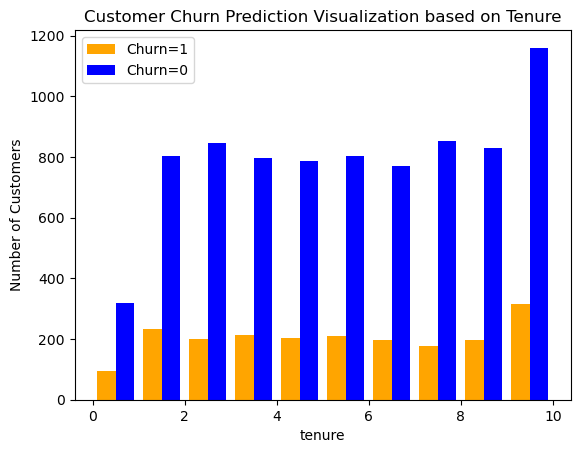

In [104]:
exited_no = data[data.Exited==0].Tenure
exited_yes=data[data.Exited==1].Tenure
plt.title('Customer Churn Prediction Visualization based on Tenure')
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.hist([exited_yes,exited_no],color=['orange','blue'],label=['Churn=1','Churn=0'])
plt.legend()

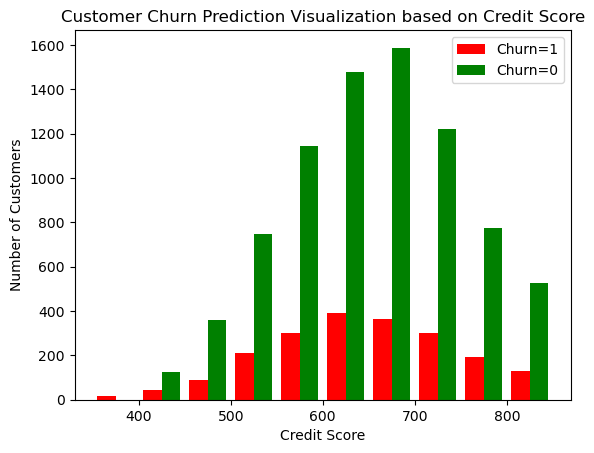

In [106]:
exited_no = data[data.Exited==0].CreditScore
exited_yes=data[data.Exited==1].CreditScore
plt.title('Customer Churn Prediction Visualization based on Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.hist([exited_yes,exited_no],color=['red','green'],label=['Churn=1','Churn=0'])
plt.legend()

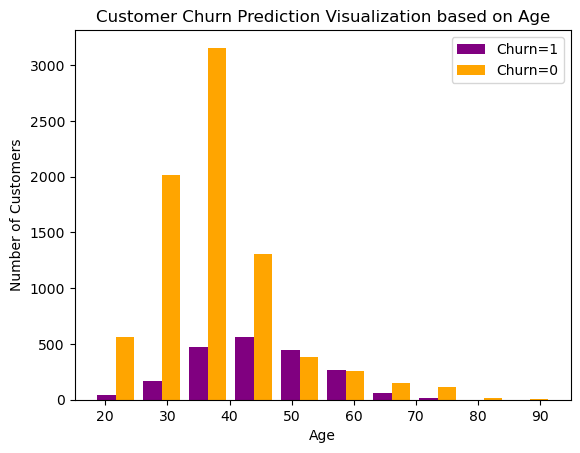

In [111]:
exited_no = data[data.Exited==0].Age
exited_yes=data[data.Exited==1].Age
plt.title('Customer Churn Prediction Visualization based on Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.hist([exited_yes,exited_no],color=['purple','orange'],label=['Churn=1','Churn=0'])
plt.legend()

##### Spliting a columns into multiple seperate parts for the ANN model to predict well. One Hot Encoding

In [113]:
data1= pd.get_dummies(data,'Geography')


In [114]:
data1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5302,701,1,39,9,140236.98,1,0,1,146651.99,0,True,False,False
5457,738,1,62,10,83008.31,1,1,1,42766.03,0,False,True,False
4862,645,0,55,1,133676.65,1,0,1,17095.49,0,False,False,True
5439,713,0,61,4,149525.34,2,1,0,123663.63,0,False,True,False
4946,546,0,47,8,0.00,1,1,1,66408.01,1,True,False,False


##### The Extra hows has changed to boolean values. W e need to change it to integer values so that it can be used in the model

In [115]:
data1.replace({False: 0, True: 1}, inplace=True)

In [116]:
data1.columns.unique()

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

#### Scaling some columns to work with the model

In [117]:
cols_to_scale = ['Balance','Tenure','EstimatedSalary','CreditScore','Age','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

In [118]:
data1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3593,0.410,0,0.594595,1.0,0.457647,0.000000,0,1,0.042169,0,0,1,0
3998,0.578,0,0.567568,0.5,0.645839,0.000000,1,1,0.421791,1,1,0,0
2930,0.626,1,0.324324,0.7,0.462064,0.000000,1,0,0.099265,0,0,1,0
9847,0.506,0,0.216216,0.9,0.000000,0.333333,1,0,0.839604,0,1,0,0
7998,0.958,1,0.135135,0.3,0.527726,0.666667,1,0,0.524438,1,0,1,0


In [119]:
for col in data1:
    print(f'{col}: {data1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

##### Spliting the model into train and test

In [120]:
x = data1.drop('Exited',axis='columns')
y = data1['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [121]:
x_train.shape

(8000, 12)

In [123]:
x_test.shape

(2000, 12)

In [124]:
x_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [125]:
len(x_train.columns)

12

##### Building the ANN model 

In [153]:
model=keras.Sequential([
    # The input_shape is the first layer, and the rest is hidden layer
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    #this one is also another hidden layer. No need of input shape becaues it is already given 
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    #this is the output layer. Because output layer the values are 0 and 1 we use sigmoid
    keras.layers.Dense(1,activation='sigmoid'),
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs1/adam',histogram_freq=1)
model.compile(optimizer='adam',
              #we use binary because we are dealing with 0 and 1
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,callbacks=[tb_callback])

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.7960
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7960
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.7960
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7966
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8149
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8155
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8180
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8198
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8244
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3925 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8679
Epoch 161/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8696
Epoch 162/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3243 - accuracy: 0.8699
Epoch 163/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8675
Epoch 164/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8674
Epoch 165/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8669
Epoch 166/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8680
Epoch 167/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8705
Epoch 168/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8675
Epoch 169/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3239 - a

###### Experimental
###### Using Tensorboard to check how our neural network performed

In [154]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [155]:
%tensorboard --logdir logs1

In [141]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8550


[0.3447808027267456, 0.8550000190734863]

##### Predicting the values to check if the model has performed well

In [142]:
yp = model.predict(x_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.03420206],
       [0.05506334],
       [0.07117154],
       [0.0981679 ],
       [0.06753822]], dtype=float32)

In [143]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [144]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [145]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [146]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.45      0.56       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

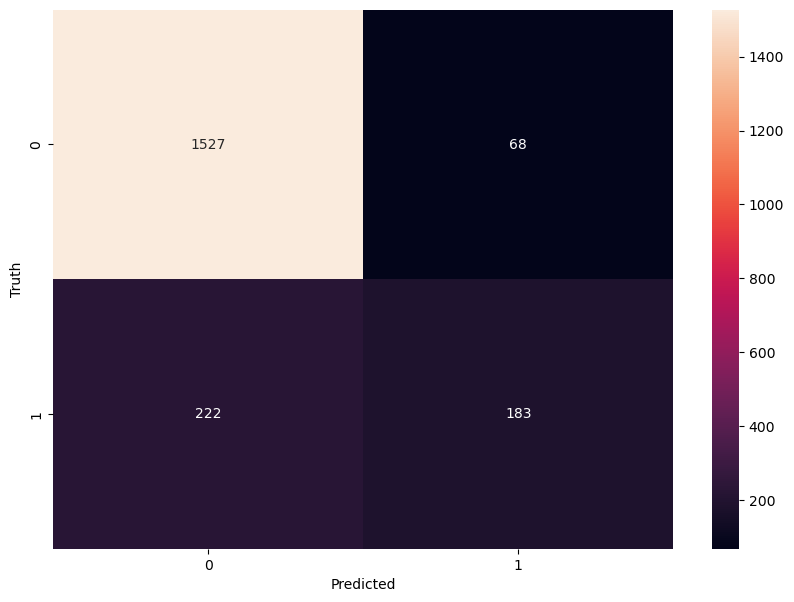

In [147]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')